In [4]:
# IMPORTS
import pandas as pd
import cpi
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
cpi.update()

In [6]:
cpi_items_df = cpi.series.get(seasonally_adjusted=False).to_dataframe()

In [7]:
cpi_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        1424 non-null   int64  
 1   date                        1424 non-null   object 
 2   value                       1424 non-null   float64
 3   series_id                   1424 non-null   object 
 4   series_title                1424 non-null   object 
 5   series_survey               1424 non-null   object 
 6   series_seasonally_adjusted  1424 non-null   bool   
 7   series_periodicity_id       1424 non-null   object 
 8   series_periodicity_code     1424 non-null   object 
 9   series_periodicity_name     1424 non-null   object 
 10  series_area_id              1424 non-null   object 
 11  series_area_code            1424 non-null   object 
 12  series_area_name            1424 non-null   object 
 13  series_items_id             1424 

In [8]:
cpi_items_df = cpi_items_df[cpi_items_df['period_type']=='monthly']
cpi_items_df['date'] = pd.to_datetime(cpi_items_df['date'])
cpi_items_df = cpi_items_df.set_index('date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


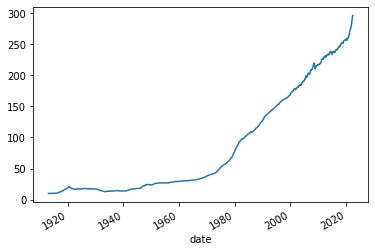

In [9]:
cpi_items_df['value'].plot()

Text(0, 0.5, 'CPI Value')

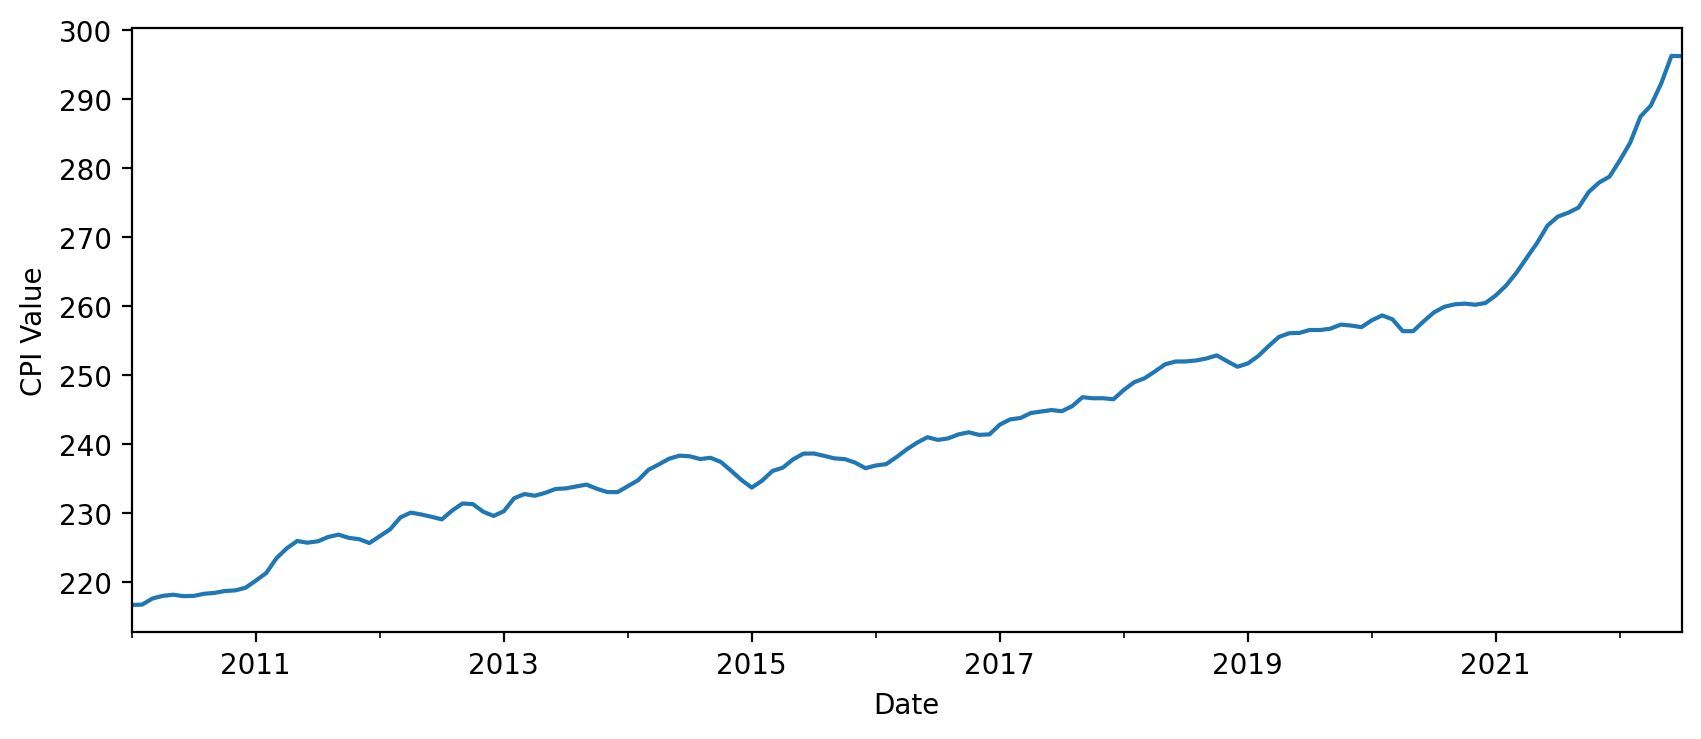

In [11]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['2010':'2023'].plot(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('CPI Value')


In [12]:
# Starting value
cpi_items_df['value'].loc['2010':'2023'].iloc[0]

216.687

In [13]:
start = cpi_items_df['value'].loc['2010':'2023'].iloc[0]

periods = len(cpi_items_df['value'].loc['2010':'2023'])//12

In [14]:
def get_target_cpi(previous_cpi):
    return previous_cpi + 0.02*(previous_cpi)

In [15]:
target_cpis = [start]
for year in range(0,periods):
    target_cpis.append(get_target_cpi(target_cpis[year]))

In [16]:
target_cpis

[216.687,
 221.02074000000002,
 225.44115480000002,
 229.949977896,
 234.54897745392,
 239.2399570029984,
 244.02475614305837,
 248.90525126591953,
 253.88335629123793,
 258.9610234170627,
 264.14024388540395,
 269.42304876311204,
 274.8115097383743]

In [17]:
len(target_cpis)

13

In [18]:
dates = pd.date_range('2010-01-01','2023-01-01',periods=periods+1)
target_cpi_series = pd.Series(data =target_cpis, index= dates)

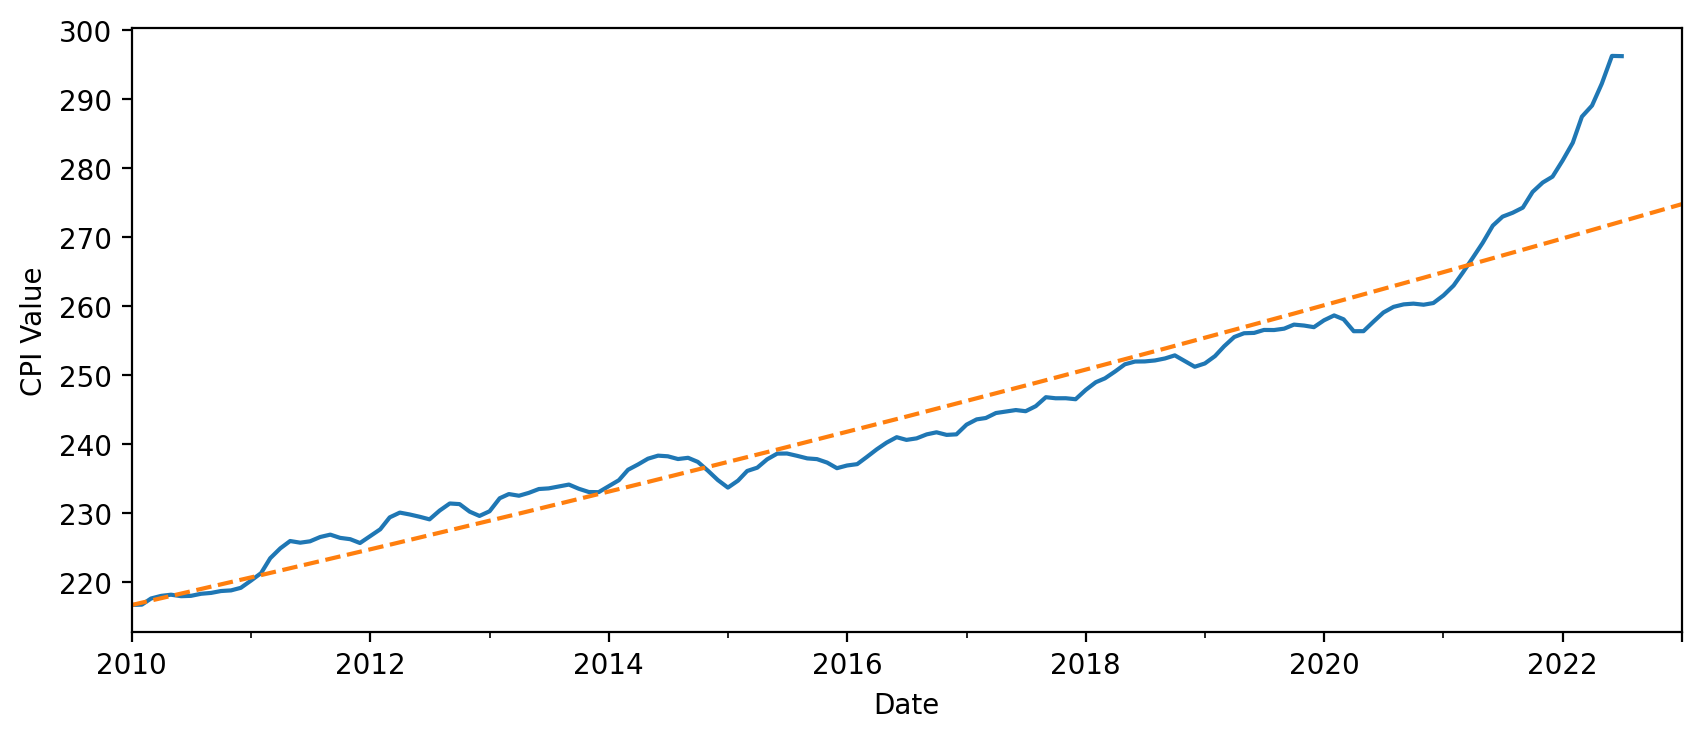

In [19]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['2010':'2023'].plot(figsize=(10,4))
target_cpi_series.plot(ls='--') 
plt.xlabel('Date')
plt.ylabel('CPI Value');

In [20]:
#Checking inflation in the 1970s
# Starting value
cpi_items_df['value'].loc['1969':'1980'].iloc[0]

35.6

In [21]:
start = cpi_items_df['value'].loc['1969':'1980'].iloc[0]

periods = len(cpi_items_df['value'].loc['1969':'1980'])//12

In [22]:
def get_target_cpi(previous_cpi):
    return previous_cpi + 0.02*(previous_cpi)

In [23]:
target_cpis = [start]
for year in range(0,periods):
    target_cpis.append(get_target_cpi(target_cpis[year]))

In [24]:
target_cpis

[35.6,
 36.312000000000005,
 37.03824,
 37.7790048,
 38.534584896000005,
 39.305276593920006,
 40.091382125798404,
 40.89320976831437,
 41.71107396368066,
 42.54529544295428,
 43.39620135181336,
 44.26412537884963,
 45.14940788642662]

In [25]:
len(target_cpis)

13

In [26]:
dates = pd.date_range('1969-01-01','1980-01-01',periods=periods+1)
target_cpi_series = pd.Series(data =target_cpis, index= dates)

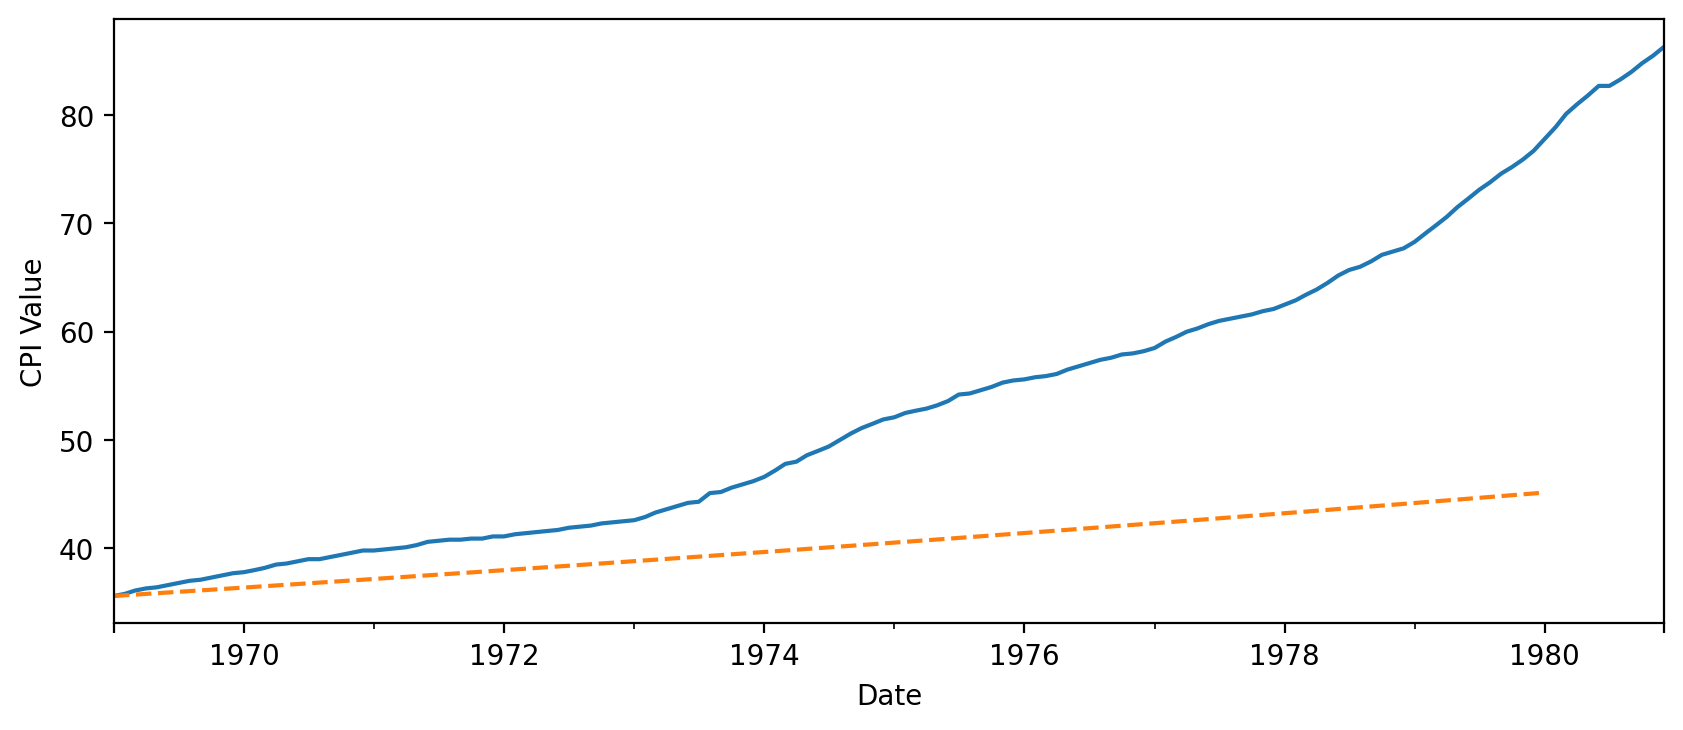

In [27]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['1969':'1980'].plot(figsize=(10,4))
target_cpi_series.plot(ls='--') 
plt.xlabel('Date')
plt.ylabel('CPI Value');

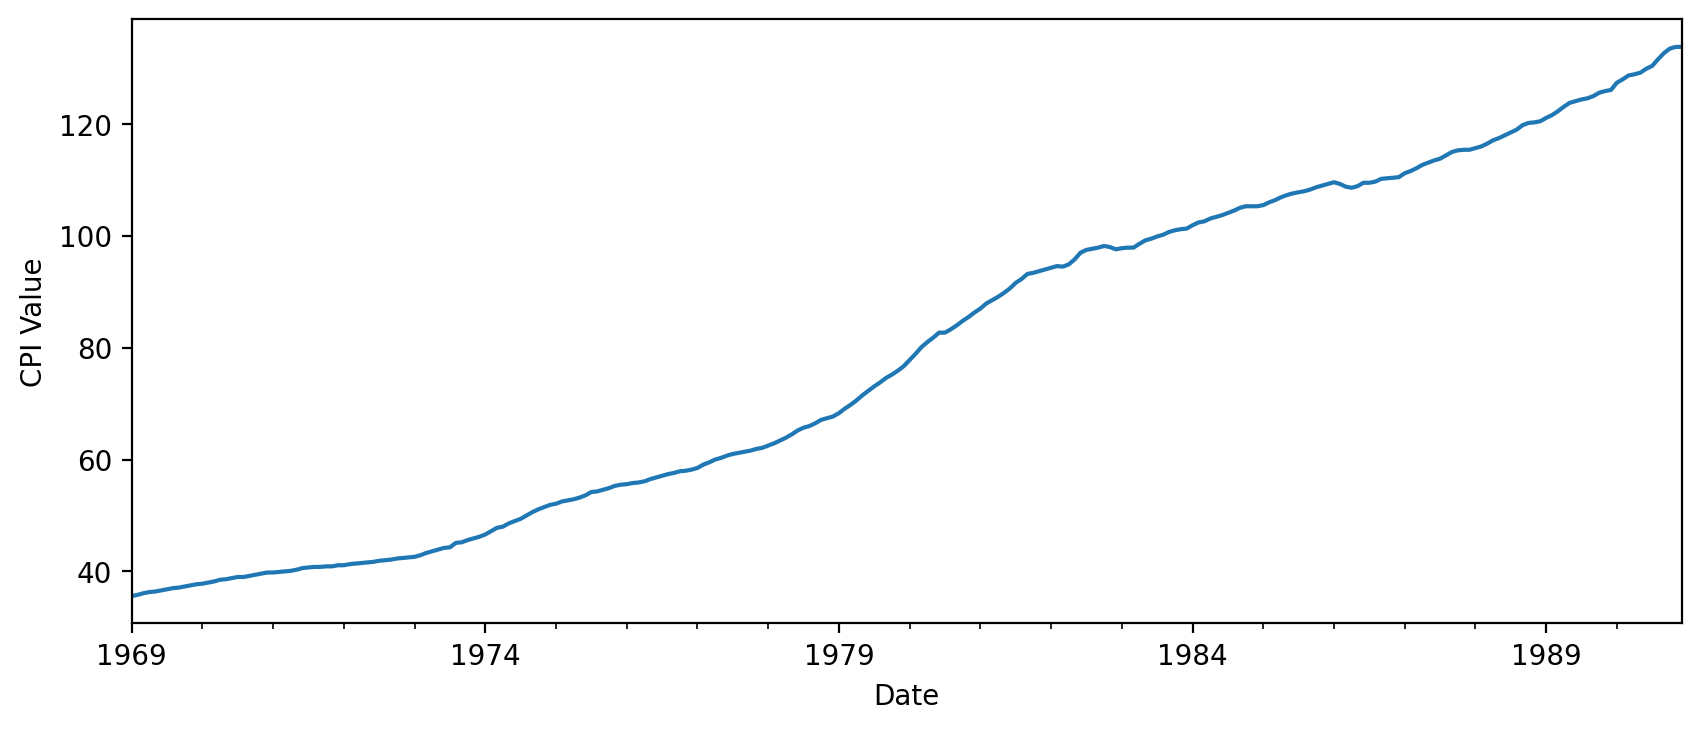

In [28]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['1969':'1990'].plot(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('CPI Value');

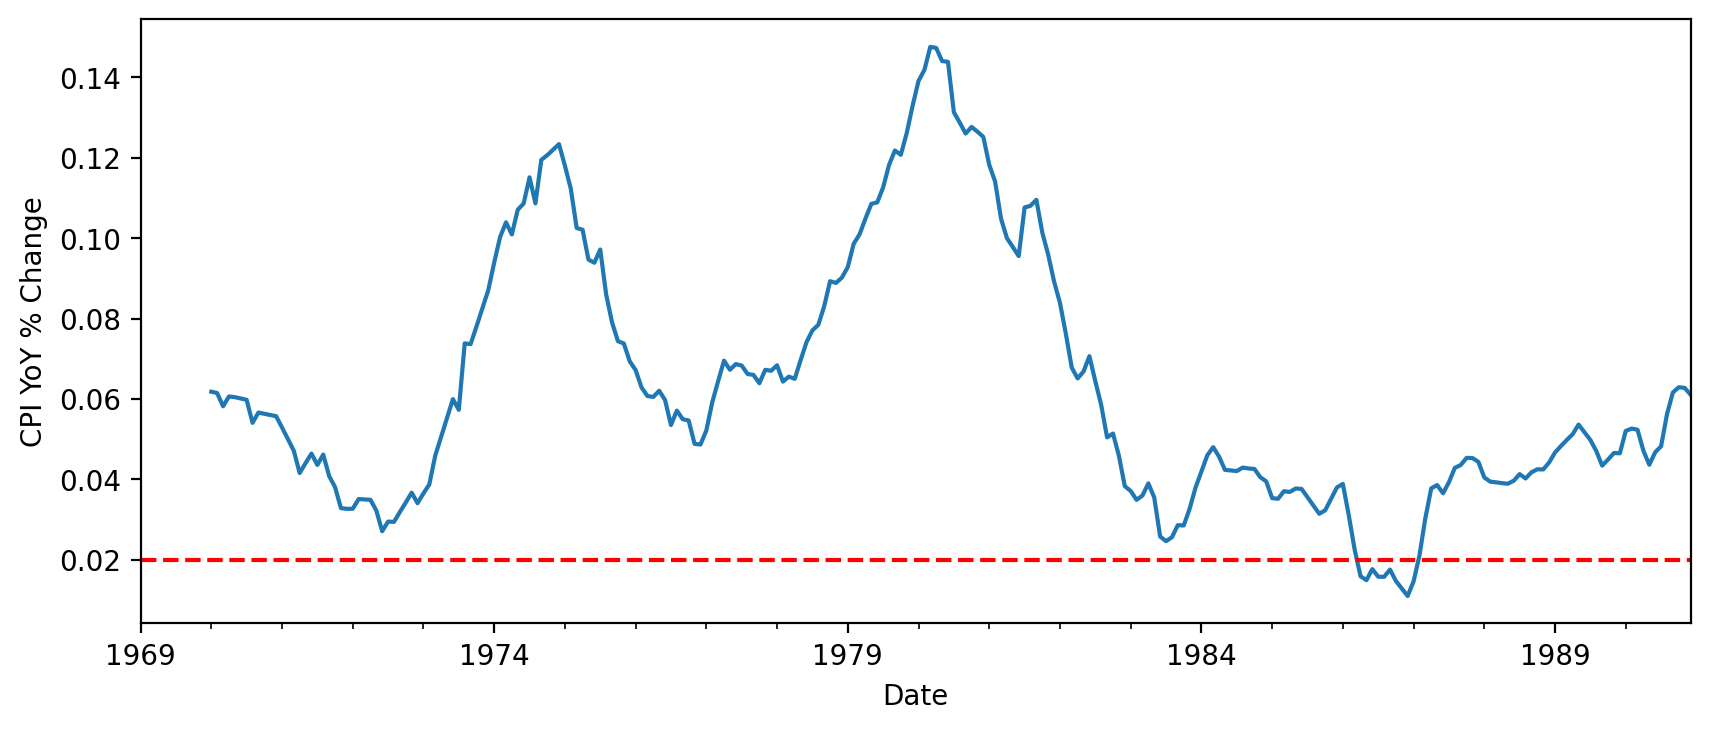

In [29]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['1969':'1990'].pct_change(12).plot(figsize=(10,4))
plt.axhline(0.02,ls='--',c='red')
plt.xlabel('Date')
plt.ylabel('CPI YoY % Change');

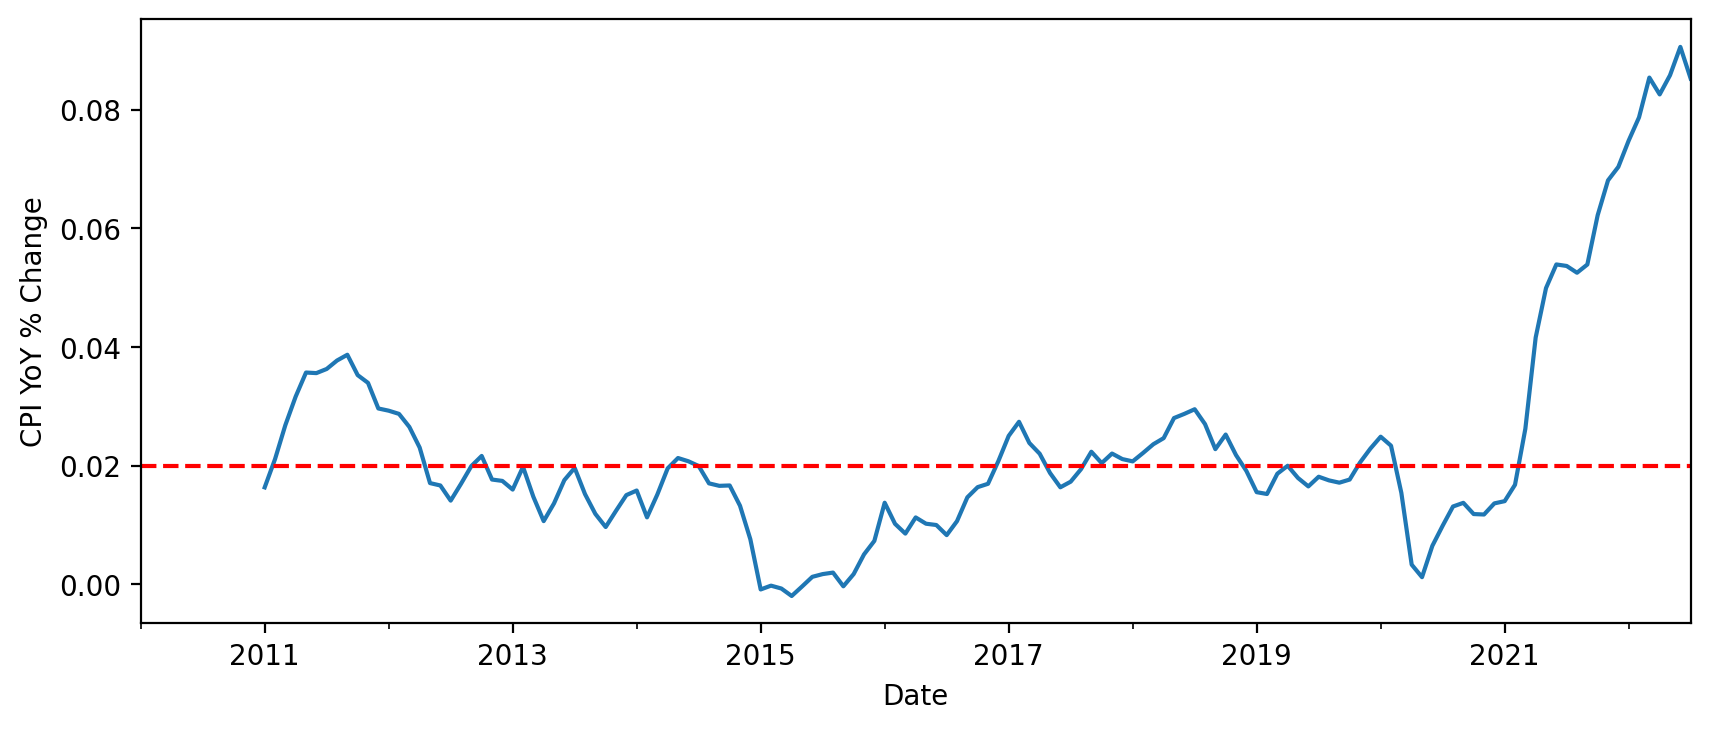

In [30]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['2010':'2023'].pct_change(12).plot(figsize=(10,4))
plt.axhline(0.02,ls='--',c='red')
plt.xlabel('Date')
plt.ylabel('CPI YoY % Change');

In [31]:
gas = cpi.series.get(items="Gasoline (all types)", seasonally_adjusted=False).to_dataframe()

In [32]:
gas = gas[gas['period_type']=='monthly']
gas['date'] = pd.to_datetime(gas['date'])
gas = gas.set_index('date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


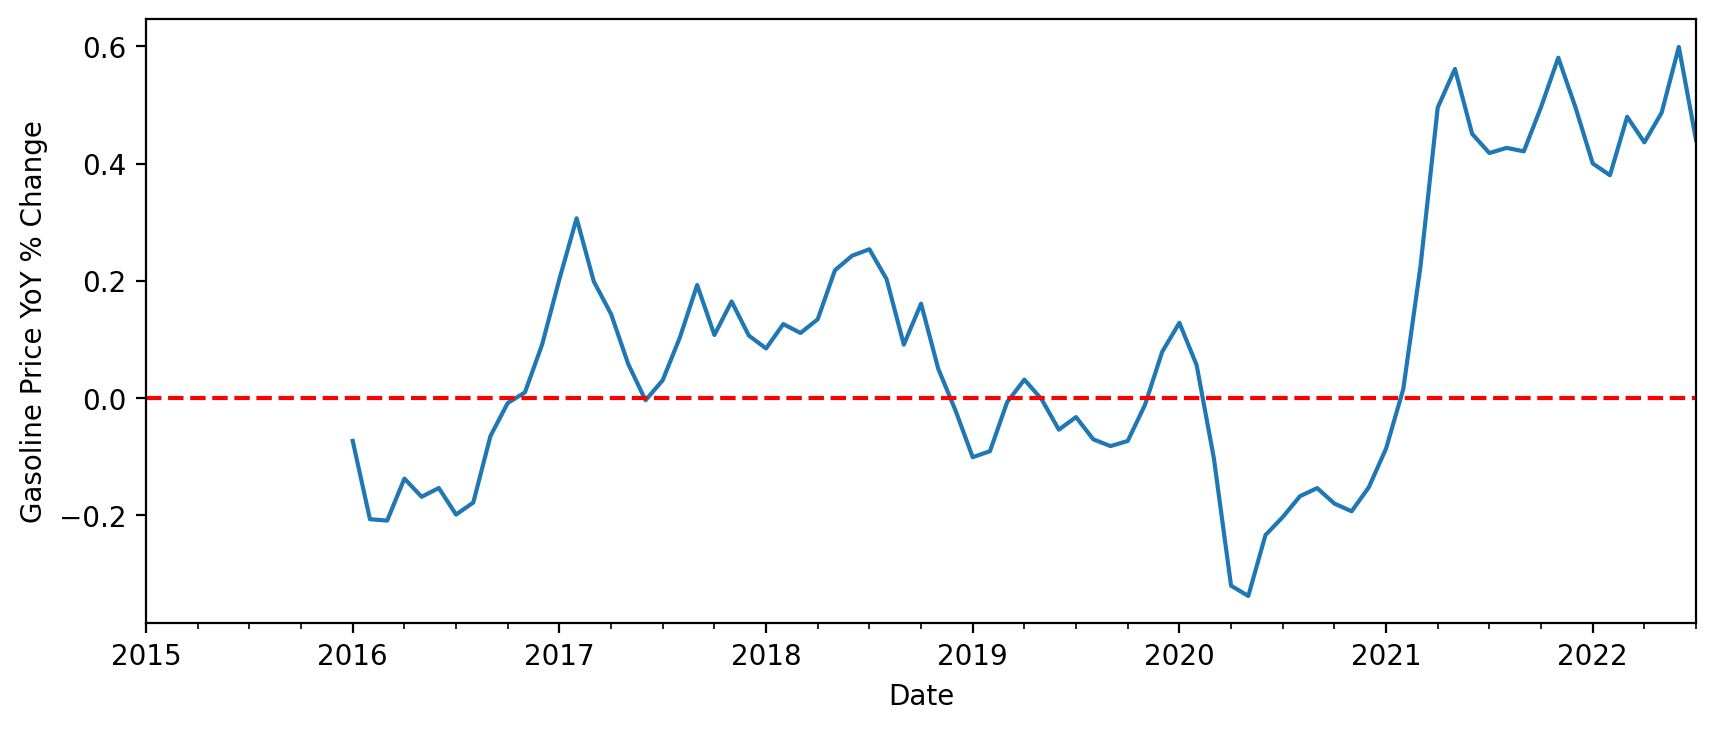

In [33]:
fig = plt.figure(dpi=200)
gas['value'].loc['2015':'2023'].pct_change(12).plot(figsize=(10,4))
plt.axhline(0,ls='--',c='red')
plt.xlabel('Date')
plt.ylabel('Gasoline Price YoY % Change');